In [1]:
import pandas as pd
mpg = pd.read_csv("mpg.csv")

<Axes: xlabel='displ', ylabel='hwy'>

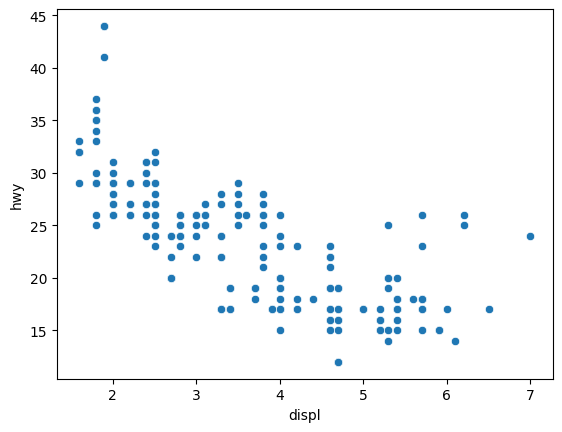

In [2]:
import seaborn as sns
sns.scatterplot(data=mpg, x="displ", y="hwy")

[(3.0, 6.0)]

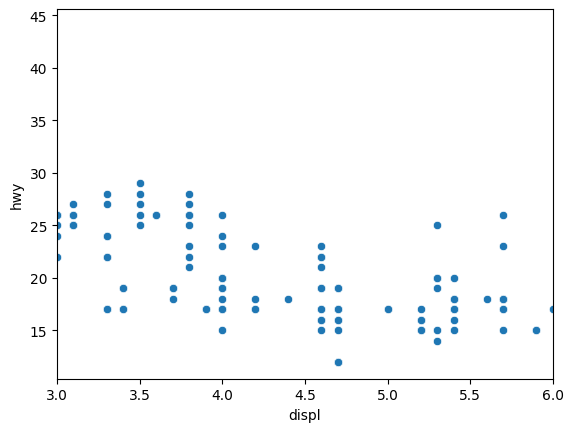

In [3]:
# x 축 점위 3~6으로 제한
sns.scatterplot(data=mpg, x="displ", y="hwy") \
    .set(xlim=[3,6])

[(3.0, 6.0), (10.0, 30.0)]

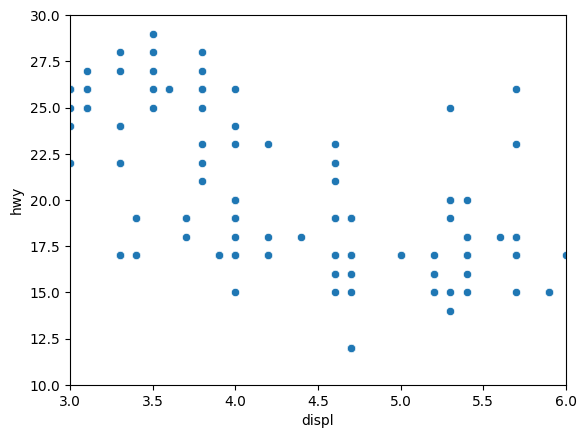

In [4]:
# x축 번위 3~6, y축 범위 10~30으로 제한
sns.scatterplot(data=mpg, x="displ", y="hwy") \
    .set(xlim=[3,6], ylim=[10,30])

<Axes: xlabel='displ', ylabel='hwy'>

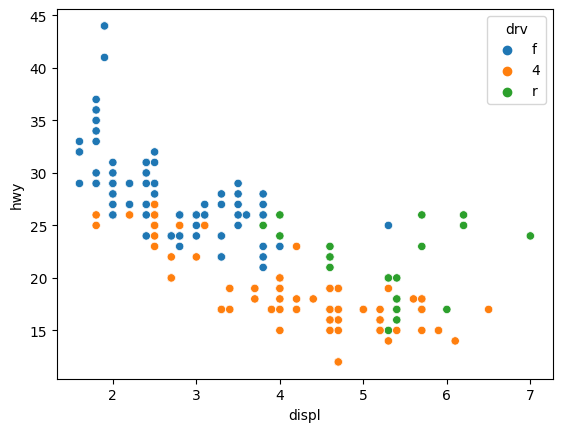

In [5]:
# drv별로 표식 색깔 다르게 표현
sns.scatterplot(data=mpg, x="displ", y="hwy", hue="drv")

<Axes: xlabel='cty', ylabel='hwy'>

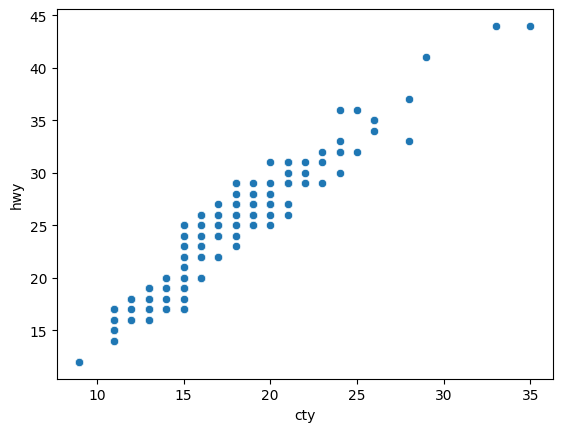

In [6]:
sns.scatterplot(data=mpg, x="cty", y="hwy")

[(0.0, 500000.0), (0.0, 10000.0)]

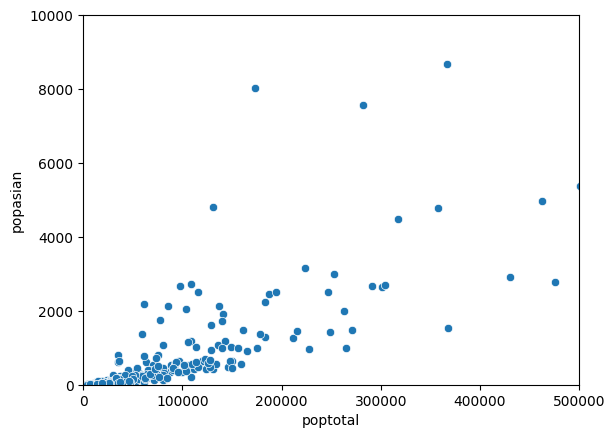

In [7]:
mid = pd.read_csv("midwest.csv")
sns.scatterplot(data=mid, x="poptotal", y="popasian") \
    .set(xlim=[0,500000], ylim=[0,10000])

In [8]:
# 집단별 빈도표 만들기
df_mpg = mpg.groupby("drv", as_index=False) \
            .agg(n=("drv", "count"))
df_mpg

,drv,n
0,4,103
1,f,106
2,r,25


<Axes: xlabel='drv', ylabel='n'>

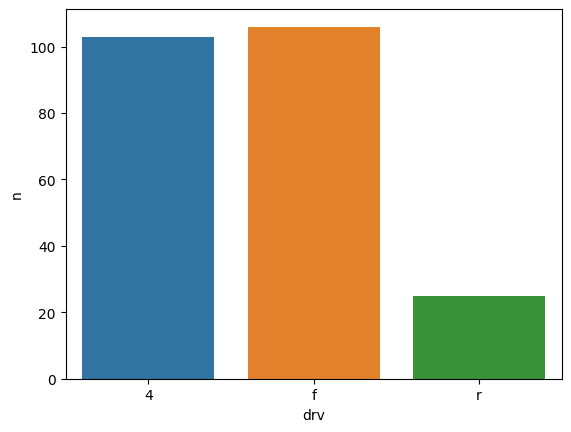

In [9]:
# 막대 그래프 만들기
sns.barplot(data=df_mpg, x="drv", y="n")

<Axes: xlabel='drv', ylabel='count'>

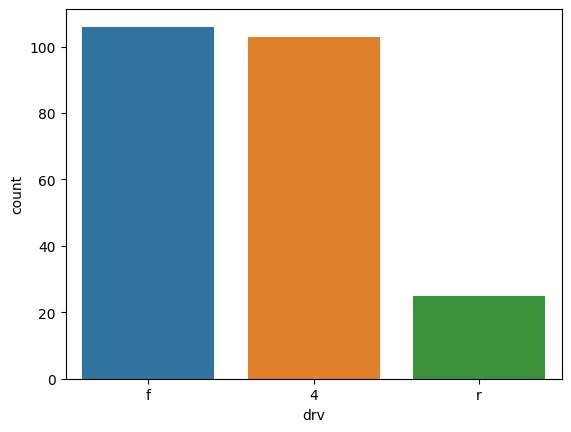

In [10]:
# 빈도 막대 그래프 만들기
sns.countplot(data=mpg, x="drv")

<Axes: xlabel='drv', ylabel='count'>

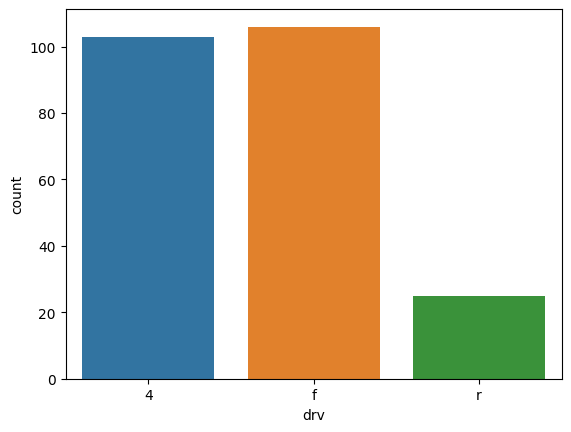

In [11]:
# 4, f, r 순으로 막대 정렬
sns.countplot(data=mpg, x="drv", order=['4', 'f', 'r'])

In [12]:
# drv의 값을 빈도가 높은 순으로 출력
mpg["drv"].value_counts().index

Index(['f', '4', 'r'], dtype='object')

<Axes: xlabel='drv', ylabel='count'>

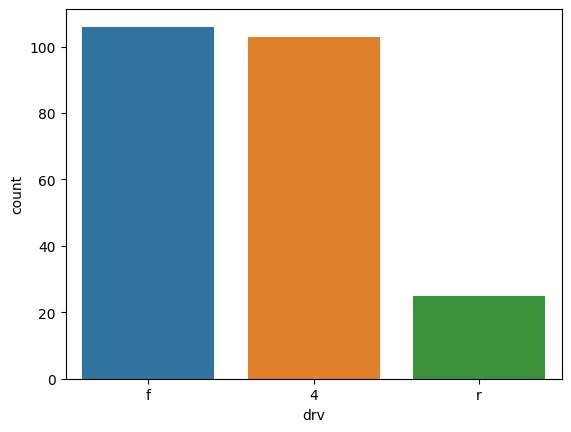

In [13]:
# drv 빈도 높은 순으로 막대 정렬
sns.countplot(data=mpg, x="drv", order=mpg["drv"].value_counts().index)

In [20]:
df = mpg.query('category == "suv"') \
        .groupby("manufacturer", as_index=False) \
        .agg(mean_cty=("cty", "mean")) \
        .sort_values("mean_cty", ascending=False) \
        .head()

df

,manufacturer,mean_cty
8,subaru,18.833333
9,toyota,14.375000
7,nissan,13.750000
3,jeep,13.500000
6,mercury,13.250000
